In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [12]:
start = '2010-01-01'
end = '2021-11-01'

df = data.DataReader('AAPL', 'yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [13]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,150.839996,149.009995,149.330002,149.320007,60893400.0,149.102402
2021-10-27,149.729996,148.490005,149.360001,148.850006,56094900.0,148.633087
2021-10-28,153.169998,149.720001,149.820007,152.570007,100077900.0,152.347656
2021-10-29,149.940002,146.410004,147.220001,149.800003,124850400.0,149.581696
2021-11-01,149.699997,147.800003,148.990005,148.960007,74588300.0,148.742920


In [14]:
df = df.reset_index()

In [15]:
df = df.drop(['Date','Adj Close'],axis = 1)

In [16]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


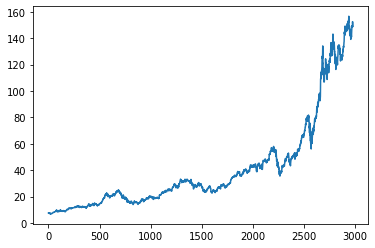

In [17]:
plt.plot(df.Close)

In [18]:
ma100 = df.Close.rolling(100).mean()

In [19]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2975    143.8821
2976    144.1116
2977    144.3699
2978    144.5966
2979    144.8251
Name: Close, Length: 2980, dtype: float64

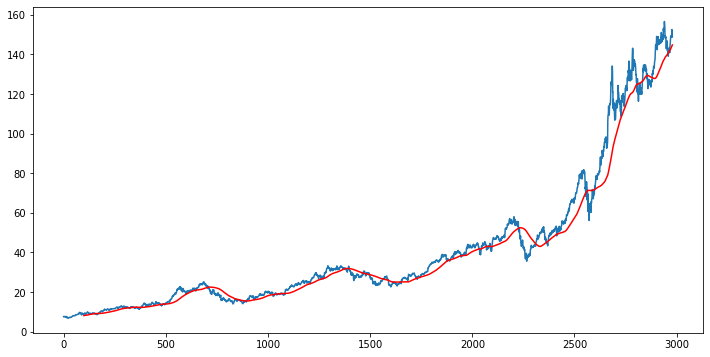

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [21]:
ma200  = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2975    136.20800
2976    136.30825
2977    136.41665
2978    136.52110
2979    136.63020
Name: Close, Length: 2980, dtype: float64

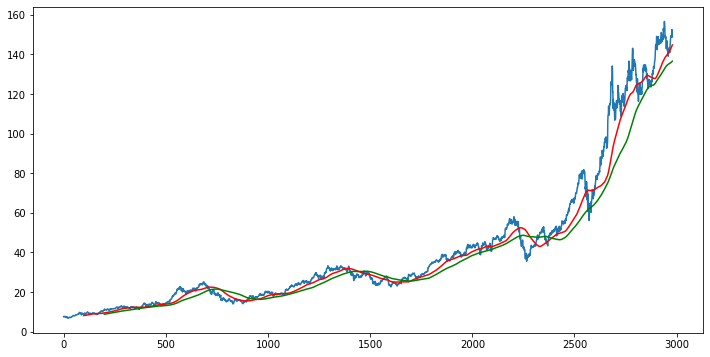

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [24]:
df.shape

(2980, 5)

In [25]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2086, 1)
(894, 1)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01729643],
       [0.02033351],
       [0.02067611],
       ...,
       [0.9508699 ],
       [0.95469399],
       [0.96175894]])

In [28]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)

In [29]:
#ML Model

In [30]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

2021-11-11 20:22:09.740473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 20:22:09.740587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [33]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))            
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))             
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))         
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 120)              

In [35]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

2021-11-11 20:33:15.416458: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
63/63 [==============================] - 25s 283ms/step - loss: 0.0448
Epoch 2/50
63/63 [==============================] - 18s 280ms/step - loss: 0.0093
Epoch 3/50
63/63 [==============================] - 18s 282ms/step - loss: 0.0082
Epoch 4/50
63/63 [==============================] - 18s 284ms/step - loss: 0.0076
Epoch 5/50
63/63 [==============================] - 18s 281ms/step - loss: 0.0068
Epoch 6/50
63/63 [==============================] - 18s 281ms/step - loss: 0.0062
Epoch 7/50
63/63 [==============================] - 18s 284ms/step - loss: 0.0057
Epoch 8/50
63/63 [==============================] - 18s 282ms/step - loss: 0.0058
Epoch 9/50
63/63 [==============================] - 18s 279ms/step - loss: 0.0055
Epoch 10/50
63/63 [==============================] - 18s 279ms/step - loss: 0.0054
Epoch 11/50
63/63 [==============================] - 18s 281ms/step - loss: 0.0048
Epoch 12/50
63/63 [==============================] - 18s 280ms/step - loss: 0.0052
Epoch 13/50
6

In [36]:
model.save('keras_model.h5')

In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = past_100_days.append(data_testing, ignore_index = True)


In [39]:
final_df.head()

,Close
0,42.494999
1,43.285000
2,43.740002
3,43.742500
4,43.522499


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0573498 ],
       [0.06387105],
       [0.06762698],
       [0.0676476 ],
       [0.06583155],
       [0.06372661],
       [0.05631796],
       [0.06120891],
       [0.05955796],
       [0.05697835],
       [0.05664816],
       [0.05534802],
       [0.05598779],
       [0.05609095],
       [0.06290112],
       [0.06089934],
       [0.06207566],
       [0.06197247],
       [0.06558392],
       [0.07063994],
       [0.0667602 ],
       [0.06636813],
       [0.06773014],
       [0.06773014],
       [0.0585674 ],
       [0.05862931],
       [0.05961987],
       [0.05580204],
       [0.062055  ],
       [0.06199309],
       [0.06364405],
       [0.06770951],
       [0.06636813],
       [0.06632684],
       [0.06624428],
       [0.06828734],
       [0.0720226 ],
       [0.0701653 ],
       [0.07617063],
       [0.0765008 ],
       [0.07484987],
       [0.07183688],
       [0.07191941],
       [0.06609984],
       [0.05968178],
       [0.06050724],
       [0.05318118],
       [0.051

In [41]:
input_data.shape

(994, 1)

In [42]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [43]:
x_test, y_test =  np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(894, 100, 1)
(894,)


In [44]:
#Making Predictions

y_predicted = model.predict(x_test)

In [45]:
y_predicted.shape

(894, 1)

In [46]:
y_test

array([0.07439586, 0.07357037, 0.06316941, 0.04855851, 0.04756795,
       0.04282147, 0.04428667, 0.04546298, 0.041542  , 0.0476092 ,
       0.05553378, 0.07094951, 0.07160987, 0.08593185, 0.08867656,
       0.09051324, 0.09321666, 0.09874732, 0.09575499, 0.09484696,
       0.09131807, 0.09490887, 0.09245311, 0.09104979, 0.09377386,
       0.09280393, 0.09528035, 0.09484696, 0.09573436, 0.09433104,
       0.09350558, 0.09220544, 0.09916008, 0.10244134, 0.10549558,
       0.10687825, 0.10580515, 0.10217305, 0.10120311, 0.10336999,
       0.10010936, 0.10031574, 0.09627091, 0.09606456, 0.08977031,
       0.09144189, 0.08929567, 0.08818126, 0.08250613, 0.08717005,
       0.08661287, 0.08937821, 0.08857337, 0.09284518, 0.08611758,
       0.08917182, 0.09447551, 0.09986173, 0.09938709, 0.09428979,
       0.10079038, 0.10140949, 0.10054275, 0.10165713, 0.09949025,
       0.10254453, 0.1016365 , 0.10198732, 0.10485584, 0.10861177,
       0.10735292, 0.10068719, 0.09847906, 0.09926324, 0.12239

In [47]:
y_predicted

array([[0.14900173],
       [0.14923191],
       [0.14963132],
       [0.1501372 ],
       [0.15063637],
       [0.15104064],
       [0.15127805],
       [0.15130793],
       [0.15111706],
       [0.1506995 ],
       [0.15009096],
       [0.14937083],
       [0.14867769],
       [0.14811343],
       [0.14780006],
       [0.14782423],
       [0.14823097],
       [0.14903419],
       [0.15023379],
       [0.15178579],
       [0.15362416],
       [0.15562928],
       [0.15771821],
       [0.15981287],
       [0.16183908],
       [0.16374816],
       [0.16549881],
       [0.1670733 ],
       [0.16846481],
       [0.16967979],
       [0.17072448],
       [0.17160676],
       [0.17233358],
       [0.17294915],
       [0.17350808],
       [0.17406625],
       [0.1746671 ],
       [0.17532863],
       [0.17603575],
       [0.17676234],
       [0.17749228],
       [0.17819424],
       [0.17884383],
       [0.17940405],
       [0.17985012],
       [0.18014564],
       [0.18027227],
       [0.180

In [48]:
scaler.scale_

array([0.00825474])

In [49]:
scale_factor = 1/0.00825474
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

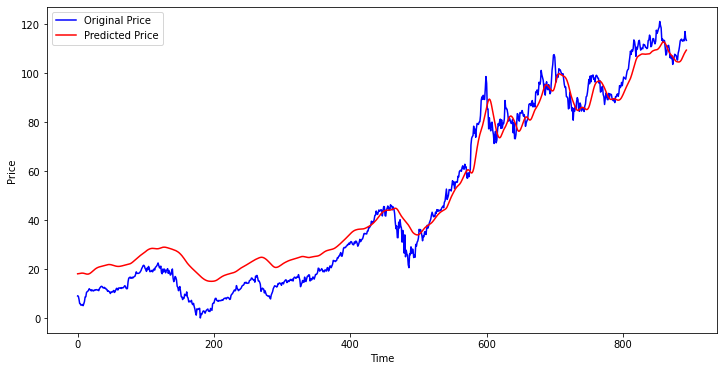

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()